In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as SkLearnLN
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 1: dataset

## 1.1: Load data

In [2]:
df = pd.read_csv('data/lr.csv')
df.isna().sum() # Kiểm tra missing values (not available)

x    0
y    0
dtype: int64

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df['x'], df['y'], test_size=0.2)

Text(0.5, 1.0, 'Scatter plot of x vs y (Training Data)')

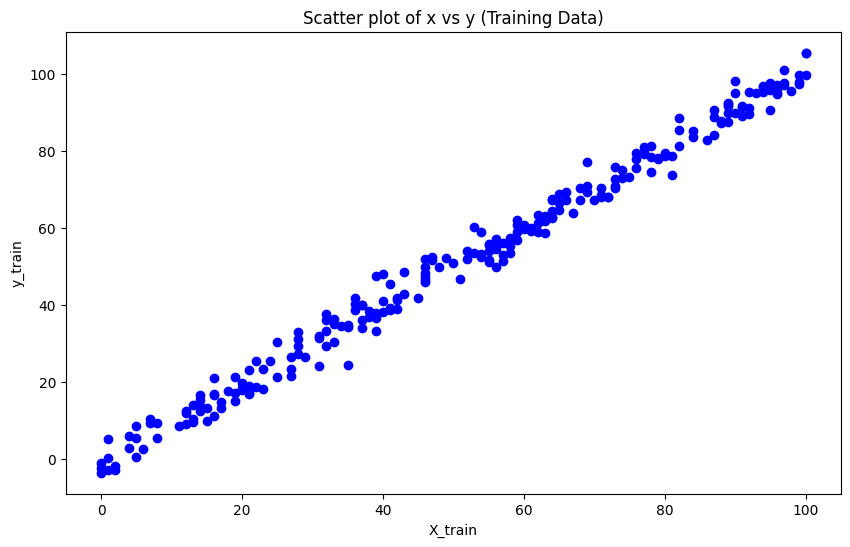

In [4]:
# Visualizing the training data
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.title('Scatter plot of x vs y (Training Data)')

## 1.2: preprocess data

In [5]:
# convert dataframe to numpy array (Giúp bỏ cột thứ tự mặc định trong dataframe)
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [6]:
# standardization data: Z-score normalization
def standardize_data(X_train, X_test):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)

    X_train_std = (X_train - mean) / std
    X_test_std = (X_test - mean) / std

    return X_train_std, X_test_std

X_train, X_test = standardize_data(X_train, X_test)

In [7]:
# Thêm 1 chiều vào cuối (Giúp phù hợp mô hình)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# 3: LR from Scratch
## Gradient Descent with Linear Regression

* **y_predict và cost function** <br>
  - \\( y_{\text{pred}} = X \cdot W + b \\)
  - \\( J = \frac{1}{2m}\sum(y_{\text{pred}} - y_{\text{true}})^2 \\)
* **Gradient của w và b**  <br>
  - \\( dW = \frac{1}{m} \sum X^T \cdot(y_{\text{pred}} - y_{\text{true}})  \\)
  - \\( db = \frac{1}{m} \sum (y_{\text{pred}} - y_{\text{true}}) \\)
* **update w và b**
  - \\( W = W - \alpha \times dW \\)
  - \\( b = b - \alpha \times db \\)
- \\( \alpha \\): learning rate
- \\( m \\): số lượng samples

In [14]:
class LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000, penalty = None):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.penalty = penalty
        self.costs = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        print(f"Initialized weights: {self.weights}, bias: {self.bias}")

        eps = 1e-5
        prev_loss = 0
        for i in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1/n_samples) * (np.dot(X.T, (y_pred - y)))
            # add regularization
            if self.penalty == 'l1': # Lasso
                dw += self.lr * np.sign(self.weights)
            elif self.penalty == 'l2': # Ridge
                dw += self.lr * 2 * self.weights
            db = (1/n_samples) * (np.sum(y_pred - y))
            self.weights = self.weights - (self.lr * dw)
            self.bias = self.bias - (self.lr * db)

            current_loss = np.mean(np.square(y_pred - y))
            self.costs.append(current_loss)

            # In thông tin mỗi 100 iterations
            if i % 100 == 0:
                print(f"Iteration {i}, Cost: {current_loss}")

            if abs(current_loss - prev_loss) < eps:
                break

            prev_loss = current_loss

        # Visualize cost
        plt.figure(figsize=(10, 6))
        plt.plot(self.costs, label='Training Cost')
        plt.title('Training Cost over Iterations')
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.legend()
        plt.grid(True)
        plt.show()

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

Initialized weights: [0.], bias: 0
Iteration 0, Cost: 3543.8151396526946
Iteration 100, Cost: 482.9020574572947
Iteration 200, Cost: 72.8019179362727
Iteration 300, Cost: 17.856834584041373
Iteration 400, Cost: 10.495310181465788
Iteration 500, Cost: 9.509015535549734
Iteration 600, Cost: 9.376872099575765
Iteration 700, Cost: 9.35916756498936


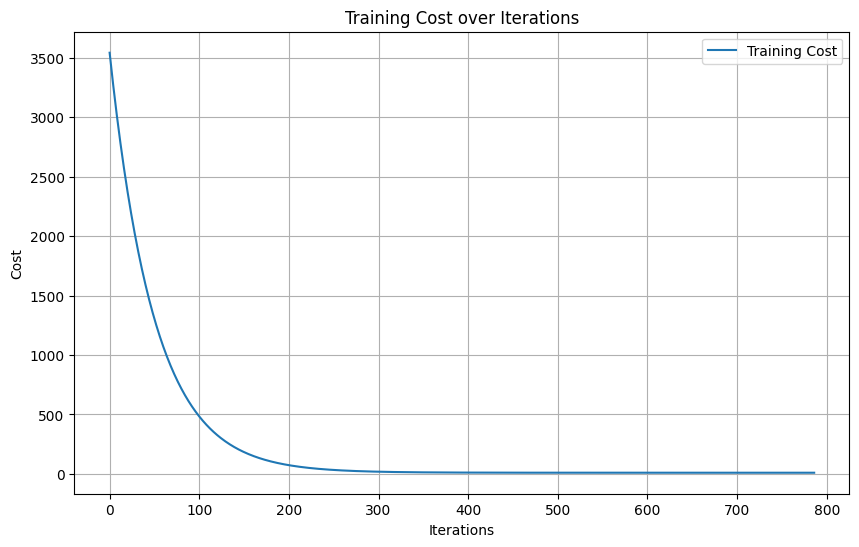

Final weights: [29.02368159], bias: 51.86028745991829


In [15]:
model = LinearRegression(0.01, 1000)
model.fit(X_train, y_train)
print(f'Final weights: {model.weights}, bias: {model.bias}')

# 4: Visualization

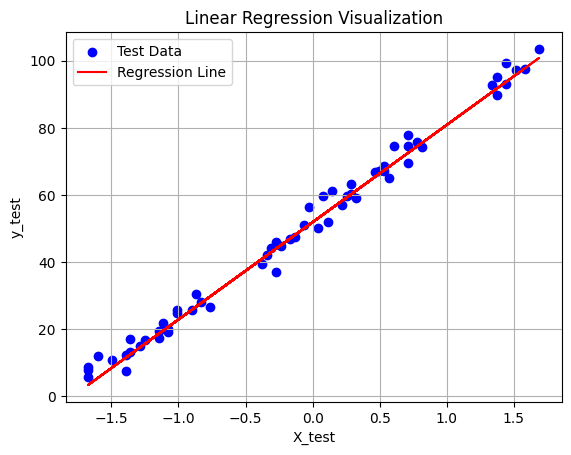

In [18]:
# 1. Plot dữ liệu test
plt.scatter(X_test, y_test, color='blue', label='Test Data')

# 2. Dự đoán theo mô hình tuyến tính: y_pred = X * W + b
y_pred_line = X_test.dot(model.weights) + model.bias

# 3. Vẽ đường hồi quy
plt.plot(X_test, y_pred_line, color='red', label='Regression Line')

# 4. Trang trí
plt.xlabel("X_test")
plt.ylabel("y_test")
plt.title("Linear Regression Visualization")
plt.legend()
plt.grid(True)
plt.show()

# 5: Evaluate model

In [20]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 8.614632624941777


# 6: LR from Sklearn

In [21]:
sklearn_model = SkLearnLN()
sklearn_model.fit(X_train, y_train)
# Evaluation sklearn model
sk_y_pred = sklearn_model.predict(X_test)
sk_mse = mean_squared_error(sk_y_pred, y_test)
print(f'Sklearn Mean Squared Error: {sk_mse}')

Sklearn Mean Squared Error: 8.58539624275096
